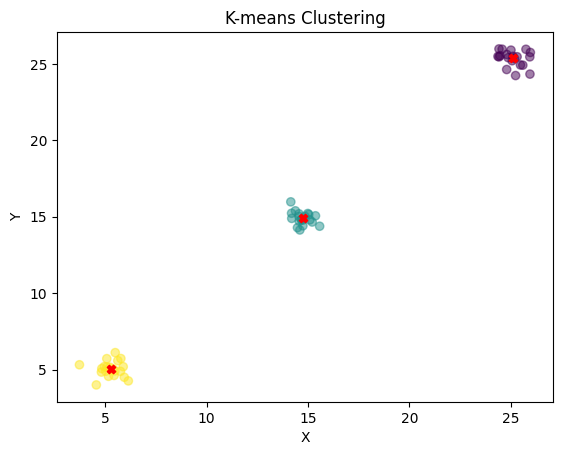

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize centroids
def initialize_centroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

# Function to assign points to the nearest centroid
def closest_centroid(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

# Function to recompute centroids
def compute_centroids(points, closest, centroids):
    return np.array([points[closest == k].mean(axis=0) for k in range(centroids.shape[0])])

# Function to run k-means algorithm
def k_means(points, k, max_iterations=100):
    centroids = initialize_centroids(points, k)
    for _ in range(max_iterations):
        closest = closest_centroid(points, centroids)
        centroids = compute_centroids(points, closest, centroids)
    return closest, centroids

# Load the dataset
# Replace 'your_dataset.csv' with the path to the dataset CSV file
df = pd.read_csv('/content/kmeans_dataset.csv')
points = df.values

# Parameters
k = 3  # Number of clusters

# Run K-means
assignments, final_centroids = k_means(points, k)

# Plotting the results
plt.scatter(points[:, 0], points[:, 1], c=assignments, alpha=0.5)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
